In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def unet_model(input_shape=(256, 256, 3), num_classes=3):
    inputs = layers.Input(shape=input_shape)

    # Encoder: Contracting Path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottom Layer
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder: Expanding Path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Output layer for segmentation
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs, outputs)
    return model

# Define the U-Net model
unet = unet_model(input_shape=(256, 256, 3), num_classes=4)
unet.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,031,940 (118.38 MB)

 Trainable params: 31,031,940 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
unet.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from skimage.io import imread
from skimage.transform import resize
import os # import os module

def load_data(image_paths, mask_paths, img_size=(256, 256)):
    images = []
    masks = []

    # Get list of image and mask files
    image_files = [f for f in os.listdir(image_paths) if os.path.isfile(os.path.join(image_paths, f))]
    mask_files = [f for f in os.listdir(mask_paths) if os.path.isfile(os.path.join(mask_paths, f))]

    for img_file, mask_file in zip(image_files, mask_files):
        # Load and resize the image
        img_path = os.path.join(image_paths, img_file) # create full image path
        img = imread(img_path)
        img = resize(img, img_size)
        images.append(img)

        # Load and resize the mask
        mask_path = os.path.join(mask_paths, mask_file) # create full mask path
        mask = imread(mask_path)
        mask = resize(mask, img_size, order=0, preserve_range=True)  # Keep categorical labels

        # Ensure masks are grayscale (if necessary)
        if len(mask.shape) == 3:
            mask = mask[:,:,0] # Select first channel if the mask has 3 channels

        # Normalize mask values to be in the range [0, num_classes - 1]
        mask = mask / 255 * (4 - 1)
        mask = mask.astype(int) # Convert to integer labels

        masks.append(mask)

    images = np.array(images)
    masks = np.array(masks)

    # One-hot encode the masks
    masks = to_categorical(masks, num_classes=4)  # 4 classes (colors)

    return images, masks

# Example usage
train_image_paths="Datasets\\New folder\\train_image"
train_mask_paths="Datasets\\New folder\\train_mask"
val_image_paths="Datasets\\New folder\\val_image"
val_mask_paths="Datasets\\New folder\\val_mask"
train_images, train_masks = load_data(train_image_paths, train_mask_paths)
val_images, val_masks = load_data(val_image_paths, val_mask_paths)

In [ ]:
from skimage.io import imread

# Try loading the image
img_path = "D:/Dv/Coding/Project/Vegetation Mapping/Datasets/New folder/train_image/PHOTO-2023-04-08-11-36-49-1.jpg" # Adjust path here
image = imread(img_path)

print("Image loaded successfully!")

Image loaded successfully!


In [17]:

# print(tf.config.list_physical_devices('GPU'))
# import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [4]:
history = unet.fit(train_images, train_masks,
                   validation_data=(val_images, val_masks),
                   epochs=50,
                   batch_size=16)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 13s/step - accuracy: 0.3055 - loss: 1.2926 - val_accuracy: 0.6733 - val_loss: 32.6625
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 63s 15s/step - accuracy: 0.7704 - loss: 9.5306 - val_accuracy: 0.6732 - val_loss: 1.0241
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 13s/step - accuracy: 0.7740 - loss: 1.0242 - val_accuracy: 0.7099 - val_loss: 1.0332
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 54s 13s/step - accuracy: 0.6043 - loss: 1.0208 - val_accuracy: 0.6136 - val_loss: 0.9476
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 56s 13s/step - accuracy: 0.6356 - loss: 0.8938 - val_accuracy: 0.6784 - val_loss: 0.6581


In [5]:
loss, accuracy = unet.evaluate(val_images, val_masks)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6784 - loss: 0.6581
Validation Loss: 0.6581027507781982
Validation Accuracy: 0.6783742308616638


In [14]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize

test_images="Datasets\\New folder\\test_image\\PHOTO-2023-04-08-11-34-43-3.jpg"
image = imread(test_images)
img = resize(image, (256,256))

# Add an extra dimension for the batch size
img = np.expand_dims(img, axis=0) 

predictions = unet.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


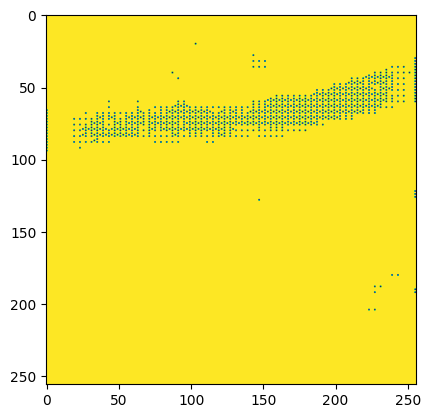

In [15]:
import matplotlib.pyplot as plt

# Visualize the predicted mask for the first test image
plt.imshow(np.argmax(predictions[0], axis=-1))
plt.show()